In [1]:
import pandas as pd
from src.system import System
from src.sampler import MCMCSampler
from src.model import *
from src.priors import *

In [2]:
df1_data = {'App Mag': [13.233], 
            'Errors': [0.1], 
            'Filter': ['H']}
df1 = pd.DataFrame(df1_data)
df1

,App Mag,Errors,Filter
0,13.233,0.1,H


In [3]:
s = System(df1, 100, 0.1)
s.init_mass_prior

UniformPrior(minval=0.0, maxval=5650000000.0)

In [ ]:
mdf = maketable('WD', filters=["H", "J"])

In [ ]:
findMags(mdf, 1.13487333e+00, 9.10543304e+09, 1.00003039e+02, filters=['H', 'J'])

In [18]:
sampler = MCMCSampler(s, num_threads=4, num_temps=1, num_walkers=150, table_type='WD', filters=["H"])

In [16]:
sampler.curr_pos

array([[6.57797889e-01, 2.89864327e+09, 9.98571974e+01],
       [7.63719916e-01, 1.53623780e+09, 9.99456550e+01],
       [1.03530566e+00, 2.62636037e+09, 1.00087892e+02],
       [3.27827239e-01, 4.56020589e+07, 9.99358010e+01],
       [1.08516428e+00, 1.45449333e+09, 1.00076250e+02],
       [7.78612319e-01, 6.71385098e+08, 1.00031944e+02],
       [8.05757276e-01, 5.56609277e+09, 1.00034113e+02],
       [6.05538325e-01, 2.51088117e+09, 1.00032967e+02],
       [8.70989208e-01, 4.11197932e+09, 9.99609877e+01],
       [9.69564820e-01, 8.19060450e+08, 1.00096546e+02],
       [7.40267895e-01, 3.10545408e+09, 1.00046035e+02],
       [8.78681287e-01, 5.83505230e+08, 9.99626403e+01],
       [4.93013812e-01, 2.40947487e+09, 1.00023722e+02],
       [5.58344784e-01, 5.10642873e+08, 9.99901948e+01],
       [2.31637595e-01, 9.41903365e+08, 1.00021241e+02],
       [1.29859143e+00, 3.57103003e+09, 1.00098070e+02],
       [1.21524121e+00, 1.06662285e+09, 9.99294584e+01],
       [8.58465869e-01, 3.91286

In [19]:
sampler.run_sampler(1000, 0, 1, "test1.hdf5")

Starting Burn in

Burn in complete. Sampling posterior now.


c:\Users\ziyya\anaconda3\lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


1000/1000 steps completed


c:\Users\ziyya\Documents\Uni\Summer 2022\AstroROP\COOLution\src\sampler.py:129: RuntimeWarning: invalid value encountered in double_scalars
  self.lnlikes[i] -= priors.all_lnpriors(orb, self.priors)


Run complete


[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

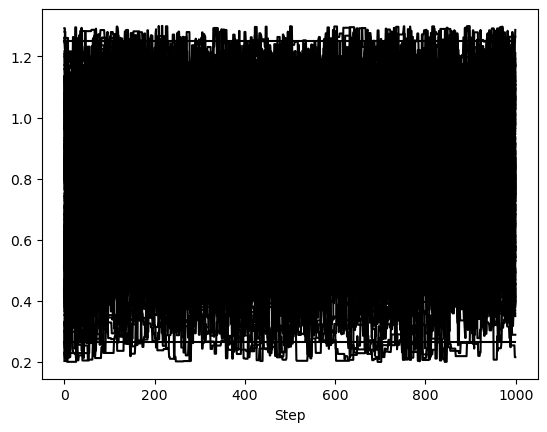

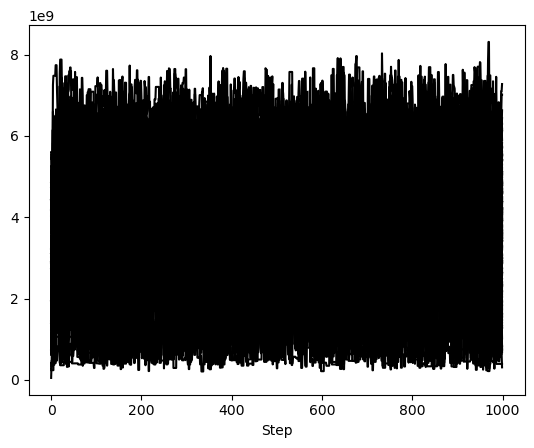

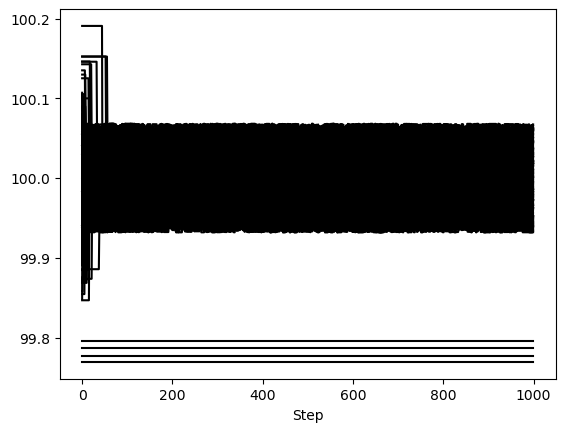

In [20]:
sampler.examine_chains()

In [ ]:
test_params = np.array([2.17289824e-01, 1.36642406e+10, 9.99720353e+01])
df1["App Mag"]

#findMags(df1, test_params[0], test_params[1], test_params[2], filts)